meta NOT subset; don't know how to subset; dropped


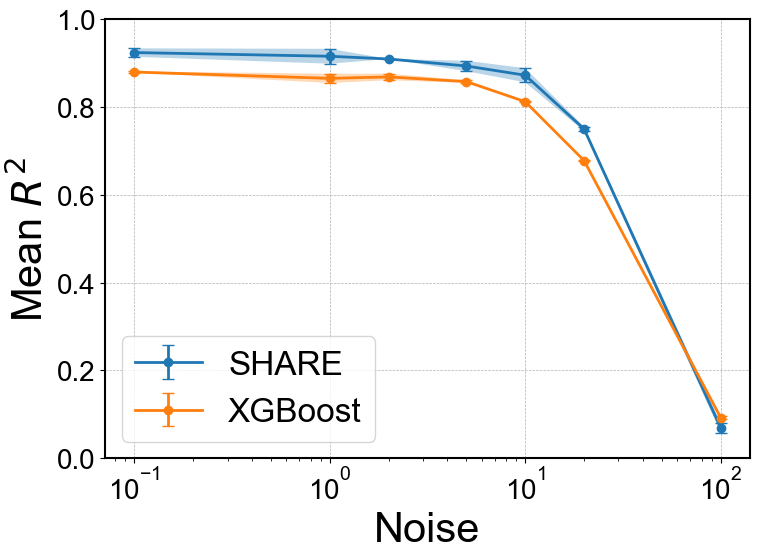

In [1]:
import sys
sys.path.append('../')
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Load the CSV files
files = glob.glob('../results/robustness/share_*.csv')
df_share = pd.concat([pd.read_csv(f) for f in files])

# Calculate the mean and standard deviation of "r2" across all "run" values
mean_r2 = df_share.groupby('noise')['r2'].mean()
std_r2 = df_share.groupby('noise')['r2'].std()

# Customize the plot to make it look professional
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['errorbar.capsize'] = 4
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Plot the mean with error bars as a function of "noise"
fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(mean_r2.index, mean_r2, yerr=std_r2, fmt='o-', capsize=4, label='SHARE')
ax.fill_between(mean_r2.index, mean_r2 - std_r2, mean_r2 + std_r2, alpha=0.3)

# Load the CSV file for XGBoost results
files = glob.glob('../results/robustness/xgb_*.csv')
assert len(files) == 1
df_xgboost = pd.read_csv(files[0])

# Filter out rows whire noise is below 0.1
df_xgboost = df_xgboost[df_xgboost['noise'] >= 0.1]

# Calculate the mean and standard deviation of "r2" across all "run" values for XGBoost
mean_r2_xgboost = df_xgboost.groupby('noise')['r2'].mean()
std_r2_xgboost = df_xgboost.groupby('noise')['r2'].std()

# Plot the mean with error bars for XGBoost
ax.errorbar(mean_r2_xgboost.index, mean_r2_xgboost, yerr=std_r2_xgboost, fmt='o-', capsize=4, label='XGBoost')
ax.fill_between(mean_r2_xgboost.index, mean_r2_xgboost - std_r2_xgboost, mean_r2_xgboost + std_r2_xgboost, alpha=0.3)


ax.set_xlabel('Noise')
ax.set_ylabel(r'Mean $R^2$')
ax.set_ylim(0, 1)
ax.set_xscale('log')
ax.legend()
ax.grid(True)



# Increase the font size of the legend and put in the lower left corner
# Increase the font size of axis labels

plt.legend(fontsize=24, loc='lower left')
plt.xlabel('Noise', fontsize=30)
plt.ylabel(r'Mean $R^2$', fontsize=30)


plt.tight_layout()
plt.savefig('figures/Figure_10.pdf')